# **Mounting Data from Google Drive**

In [ ]:
# To get the dataset from google drive to google colab
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importiong Deep Learning Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten,  GlobalAveragePooling2D , Convolution2D  , BatchNormalization , Activation , MaxPooling2D
  
from tensorflow.keras.models import Model, Sequential
import os
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.applications import MobileNetV3Large ,MobileNetV2
import matplotlib.pyplot as plt
import random, cv2
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint

# **Pre-Processing**

In [ ]:
#Image augemntation by rescaling and horizontal 
train_datagen = ImageDataGenerator( rescale=1./255, horizontal_flip=True )
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True )

In [ ]:
#Creating two folders one for training and the other for validation
train_dataset= train_datagen.flow_from_directory('//content/drive/MyDrive/Second/data/training', 
                                         target_size= (224, 224),
                                         class_mode= 'categorical'
                                         )

test_dataset= test_datagen.flow_from_directory('/content/drive/MyDrive/Second/data/testing', 
                                                    target_size= (224, 224),
                                                                class_mode= 'categorical')

Found 3000 images belonging to 5 classes.
Found 662 images belonging to 5 classes.


# **Sample image plot after pre-processing the datset**








[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


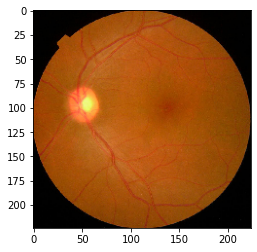

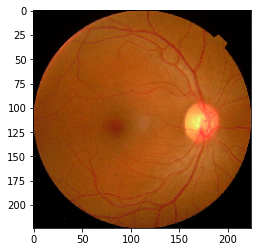

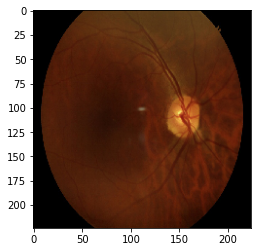

In [ ]:
# what the inputs/images look like after augmentation
for i in range (0,3):
    random_num = random.randint(0,26)
    image = train_dataset[random_num]
 
  
    plt.figure()
    print(image[1][0])
    plt.imshow(image[0][0])

# **Building the model**

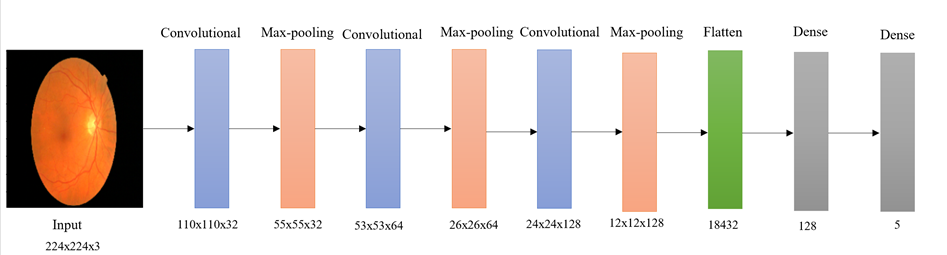

In [ ]:
model = Sequential()
# 32x32
model.add(Convolution2D(filters=32, kernel_size=5, strides=2 , input_shape=[224, 224, 3])) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
# 64x64
model.add(Convolution2D(filters=64, kernel_size=3 ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
# 128x128
model.add(Convolution2D(filters=128, kernel_size=3 ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
# 224x224 
# fully connected layer with dense 5 for DR classification
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="softmax"))



#  **Setting learning rate and loss function**

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 110, 110, 32)      2432      
                                                                 
 batch_normalization_3 (Batc  (None, 110, 110, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 53, 53, 64)      

# **Training the model**



In [ ]:
history= model.fit(
       train_dataset ,
        
        epochs=30, verbose = 1,
        validation_data=test_dataset
        )

Epoch 1/30
94/94 [==============================] - 3299s 35s/step - loss: 0.9575 - accuracy: 0.6770 - val_loss: 1.6131 - val_accuracy: 0.2553
Epoch 2/30
94/94 [==============================] - 481s 5s/step - loss: 0.7592 - accuracy: 0.7227 - val_loss: 1.8451 - val_accuracy: 0.2356
Epoch 3/30
94/94 [==============================] - 489s 5s/step - loss: 0.7099 - accuracy: 0.7410 - val_loss: 1.6887 - val_accuracy: 0.2568
Epoch 4/30
94/94 [==============================] - 486s 5s/step - loss: 0.6788 - accuracy: 0.7457 - val_loss: 1.5934 - val_accuracy: 0.3157
Epoch 5/30
94/94 [==============================] - 488s 5s/step - loss: 0.6295 - accuracy: 0.7650 - val_loss: 0.9621 - val_accuracy: 0.6798
Epoch 6/30
94/94 [==============================] - 485s 5s/step - loss: 0.6183 - accuracy: 0.7707 - val_loss: 0.7657 - val_accuracy: 0.7356
Epoch 7/30
94/94 [==============================] - 481s 5s/step - loss: 0.5973 - accuracy: 0.7737 - val_loss: 0.7030 - val_accuracy: 0.7462
Epoch 8/30


# **Plotting Loss and Accuracy**

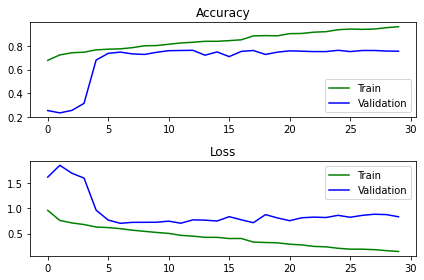

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]